<a href="https://colab.research.google.com/github/surajkumar089/EDA_Capstone_Project_Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Importing the librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
import plotly.express as pltx

In [2]:
# Importing the data set

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
Df=pd.read_csv('/content/drive/MyDrive/Hotel_Book_Analysis/Hotel Bookings.csv')

#Total rows and columns  of data frame

In [8]:
Df.shape

(119390, 32)

# Getting the information of the data frame 

In [9]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Getting the starting 5 information about the dataset

In [10]:
Df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


#Getting the information about the null value.

In [11]:
Df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#Filling the null data values with 0 and creating a new data frame

In [12]:
Df1=Df.fillna(value=0)

#Checking again whether null values are there or replaced.

In [13]:
Df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#Getting a columns name

In [14]:
Df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#Information about the descriptions of the data set.

In [15]:
Df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Data Analysis & Visualization

In [16]:
#Finding the types of data in the data frame
Df1.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

In [19]:
#Finding the values each hotels have
Df1['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [20]:
#Finding the values each hotels have
Df1['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [21]:
# After the hotel information we will get the information about the arrival date as per month
Df1['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

#Now we will visualize the information that we found above i.e Hotel and arrival date as per month

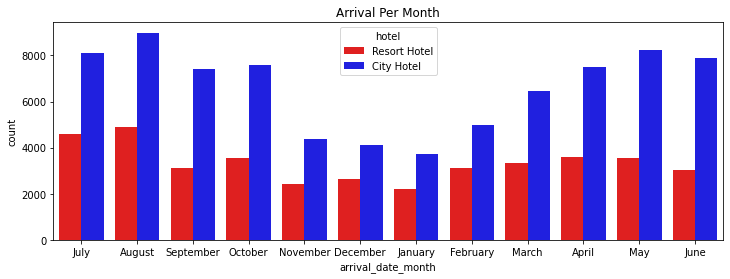

In [23]:
colours = ["red", "blue"]

plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= Df1,palette=colours)
plt.title('Arrival Per Month')
plt.show()

#Now we will find which are the most busy months

In [24]:
#Which are the most busy months
busiest_month = Df1['arrival_date_month'].value_counts().reset_index()
busiest_month.columns=['months','Number of guests']
busiest_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
busiest_month['months'] = pd.Categorical(busiest_month['months'], categories=months, ordered=True)
busiest_month.sort_values('months').reset_index()

resot_data = Df1[(Df1['hotel'] == 'Resort Hotel') & (Df1['is_canceled'] == 0)]
data_city = Df1[(Df1['hotel'] == 'City Hotel') & (Df1['is_canceled'] == 0)]
resort_hotel1 = resot_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
last_hotel = resort_hotel1.merge(city_hotel, on = 'arrival_date_month')
last_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
last_hotel

guest_resort = resot_data['arrival_date_month'].value_counts().reset_index()
guest_resort.columns=['month','no of guests']
guest_resort

guest_city = data_city['arrival_date_month'].value_counts().reset_index()
guest_city.columns=['month','no of guests']
guest_city

final_guest=guest_resort.merge(guest_city, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Now we will Visualization

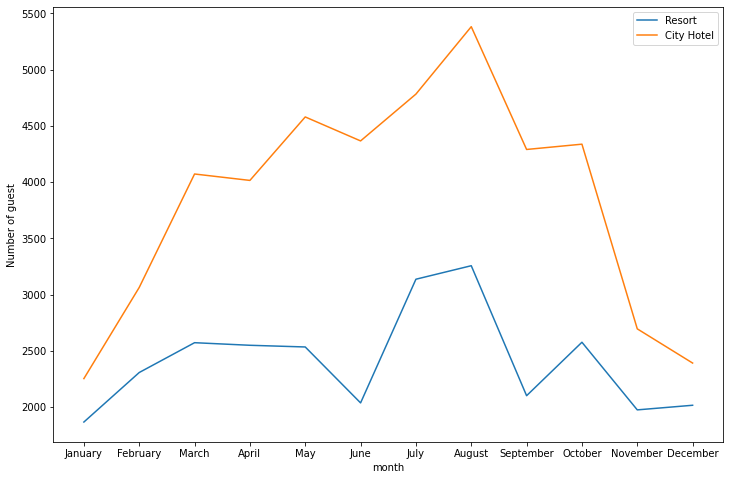

In [30]:
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.legend(['Resort','City Hotel'])

In [31]:
Df1.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [32]:
# Getting a total count year wise
Df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

#Visualization the total year in which maximum guest arrive.

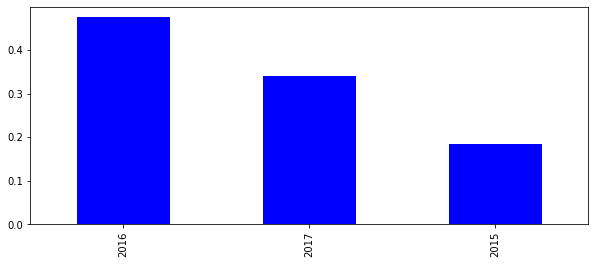

In [34]:
plt.figure(figsize=(10,4))
Df1.arrival_date_year.value_counts(normalize=True).plot(kind="bar",color='blue')                                               
plt.show()

In [35]:
# Filter data where value of adults, children and babies = 0

filtered_data = (Df1['children']==0) & (Df1['adults']==0) & (Df1['babies']==0)

# reading the data frame where adult,children and babies are 0
Df1[filtered_data]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


#There are numerous rows with incorrect values, so we will eliminate them.

In [37]:
Correct_Df= Df1[~filtered_data]
Correct_Df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


#How does the cost per night change throughout the year?

In [38]:
Resort_datas = Df1[(Df1['hotel'] == 'Resort Hotel') & (Df1['is_canceled'] == 0)]
Cities_datas = Df1[(Df1['hotel'] == 'City Hotel') & (Df1['is_canceled'] == 0)]

Resort hotel ADR analysis

In [39]:
Resort_Hotel = Resort_datas.groupby(['arrival_date_month'])['adr'].mean().reset_index()
Resort_Hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


#Visualization of the Resort Hotel using the Standard Deviation.

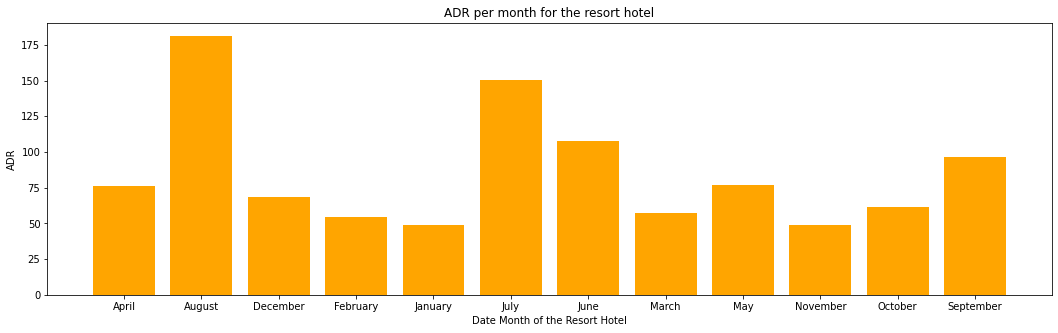

In [41]:
Date_Month_Hotel=Resort_Hotel['arrival_date_month']
Average_Distributed_Rate=Resort_Hotel['adr']
fig = plt.figure(figsize =(18,5))
#Creating the bar plot
plt.bar(Date_Month_Hotel, Average_Distributed_Rate,color = 'orange')
plt.xlabel("Date Month of the Resort Hotel")
plt.ylabel("ADR")
plt.title("ADR per month for the resort hotel")
plt.show()

In [42]:
#CITY RESORT ADR REVIEW
City_Resort= Cities_datas.groupby(['arrival_date_month'])['adr'].mean().reset_index() 
City_Resort

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


#We will now evaluate the regions of the nation from where guests are checking into the hotel and the nations with the most visitors.

In [43]:
Country_Wise_Guest = Df1[Df1['is_canceled'] == 0]['country'].value_counts().reset_index()
Country_Wise_Guest.columns = ['country', 'No. of guests']
Country_Wise_Guest

,country,No. of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [44]:
Base_map = folium.Map()
Guest_map = pltx.choropleth(Country_Wise_Guest, locations = Country_Wise_Guest['country'],
                            color = Country_Wise_Guest['country'], hover_name = Country_Wise_Guest['country'])
Guest_map.show()

#Information about the types of customers who stay at the hotel

In [45]:
Df1['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Visualization of Customer Type

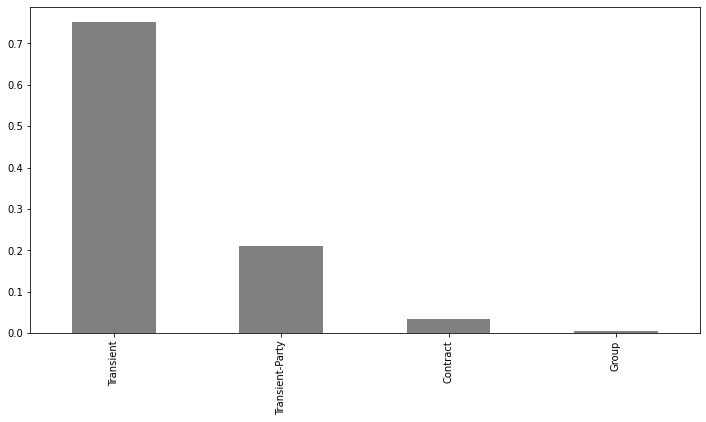

In [46]:
plt.figure(figsize=(12,6))
Df1.customer_type.value_counts(normalize=True).plot(kind="bar",color='grey')
plt.show()

#The type of deposit will then be determined from the data set, along with the preferred deposit type.

In [47]:
Df1['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Visualization of the type of deposit

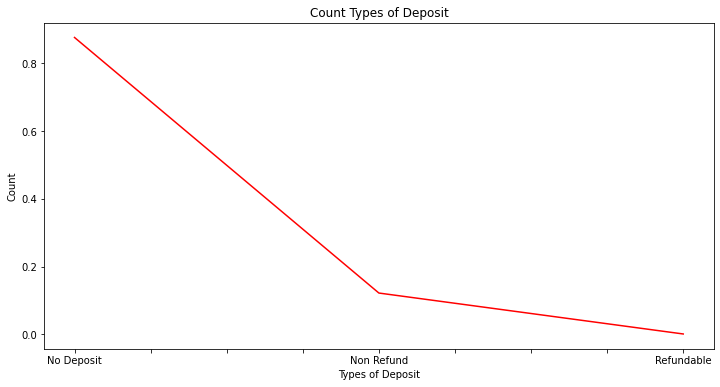

In [48]:
plt.figure(figsize=(12,6))
Df1.deposit_type.value_counts(normalize=True).plot(kind="line",color='red')
plt.xlabel("Types of Deposit")
plt.ylabel("Count")   
plt.title("Count Types of Deposit")                                                     
plt.show()

#Market segmentation is a marketing technique that involves identifying specific customer groups so that items or product lines can be presented to them in a way that appeals to their preferences.

In [52]:
Df1['market_segment'].value_counts() #.reset_index()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

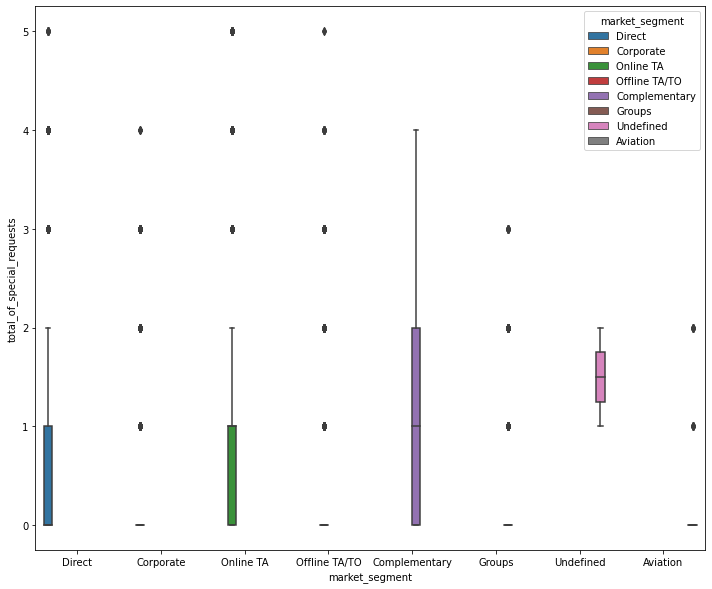

In [53]:
# Special request acording to market segment.
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= Df1)
fig= plt.gcf()
fig.set_size_inches(12,10)

#Conclusion

The majority of the hotels reserved are in cities. Those hotels should definitely receive the majority of the targeted funding. We are also aware that the high cancellation rate may be related to strict no deposit policies.

We should also aim for the months of May through August. Due to the summer season, those are the busiest months.
Western European nations make up the majority of the visitors. These are the areas where we should allocate a significant percentage of our budget.


1. This data shows that there are significantly more city hotels than resort hotels. Most people generally stick with city hotels because resort hotels tend to be on the expensive side.

2. Most visitors stay in hotels for fewer than 7 days, and resort hotels are chosen for longer periods.

3. City hotels bookings are more canceled than resort hotels.

4. The majority of the visitors were from European nations, with the majority being from Portugal.

5. Booking cancellations are unaffected by not receiving the exact accommodation that was reserved, extended lead times, and waiting times. Although adr is reduced by varied room allocation.

6. Customers book through many channels, with TA/TO being the most popular option.

7. TA and TO have emerged as the most powerful market segments and distribution channels, followed by the direct channel with the hotel.

8. In the final scenario, a special offer could be used to encourage the use of this channel.